[source code](https://github.com/ndang01/ndang01.github.io/blob/main/posts/blog4/LinearRegression.py)

# Creating the testing and validation data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

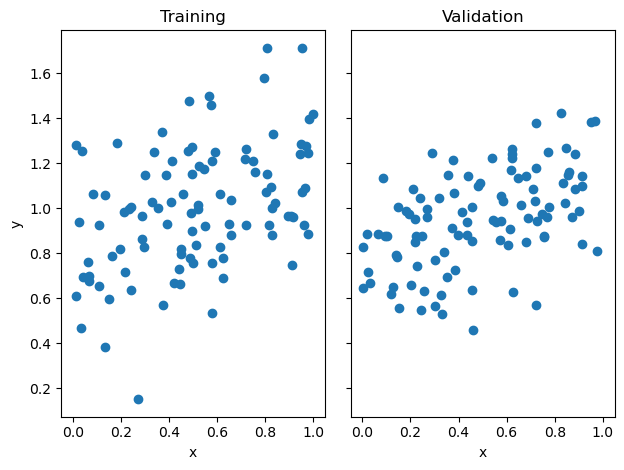

In [2]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot data
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()
plt.savefig("image.jpg")

# Using an analytical formula to implement least-squares linear regression

I utilized the following analytical formula for the optimal weight vector from the lecture notes to implement least-squares linear regression. 

$$\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\;$$

In [3]:
from LinearRegression import LinearRegression

LR = LinearRegression()
LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")
print(f"The estimated weight vector is {LR.w}")

Training score = 0.1794
Validation score = 0.2142
The estimated weight vector is [0.40551937 0.79095312]


#  Implementing gradient descent for linear regression

The formula for the gradient is:

$$ \nabla L(\mathbf{w}) = 2\mathbf{X}^T(\mathbf{X}\mathbf{w}- \mathbf{y})\;$$

In [4]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train, alpha = 0.01, max_iter = 1e2)
print(f"The estimated weight vector using gradient descent is {LR2.w}")

The estimated weight vector using gradient descent is [0.4055465  0.79093819]


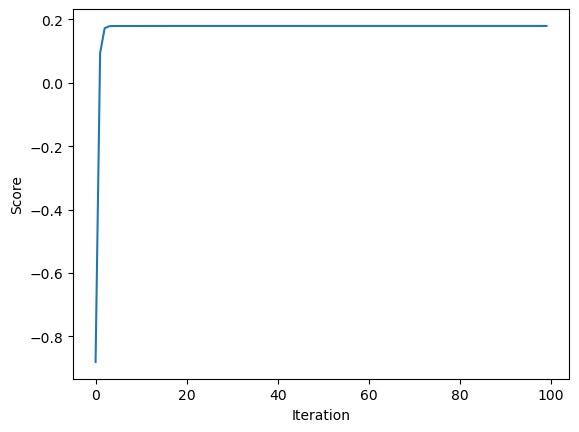

In [5]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

# Increasing p_features

Below, we will perform an experiment in which p_features, the number of features used, will increase, while holding n_train, the number of training points, constant.

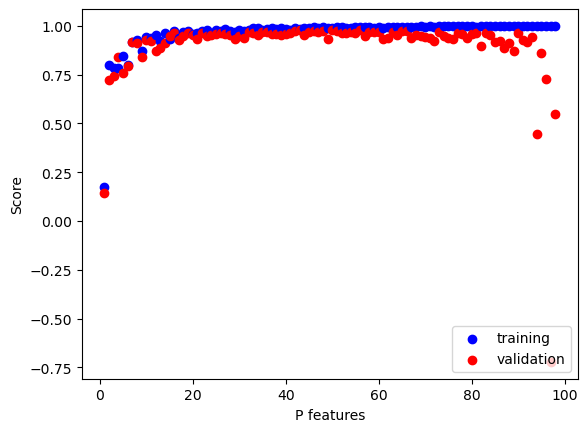

In [6]:
#increasing p_features 
p_features = n_train - 1

for p in range(1, p_features):
    #generate data
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p, noise)
     #fit data to linear regression model
    LR3 = LinearRegression()
    LR3.fit_analytic(X_train, y_train)  
    #score the model 
    score_train = LR3.score(X_train, y_train)
    score_val = LR3.score(X_val, y_val)
        
    if p == 1:
        plt.scatter(p, score_train, color = "blue", label = "training")
        plt.scatter(p, score_val, color = "red", label = "validation") 
    else:
        plt.scatter(p, score_train, color = "blue")
        plt.scatter(p, score_val, color = "red") 

#plot
labels = plt.gca().set(xlabel = "P features", ylabel = "Score")
legend = plt.legend(loc='lower right')
    

As we can see, the training score achieves a high accuracy very quickly as we increases the number of features. However, our validation score fails to achieve a high accuracy score as we increase the number of features. This happened because our model runs into the issue of  overfitting. Our model was not able to generalize well, and performed poorly when encountering new data. The model focused too closely on the noise in the training data to the extend that it negatively impacts the performance of the validation data. 

# LASSO Regularization

Below, we replicate the same experiment as the one above by increasing the number of features, but using LASSO instead of linear regression. 

The LASSO algorithm uses a modified loss function with a regularization term:

$$L(\mathbf{w}) = \lVert \mathbf{X}\mathbf{w}- \mathbf{y} \rVert_2^2 + \alpha \lVert \mathbf{w}' \rVert_1\;$$

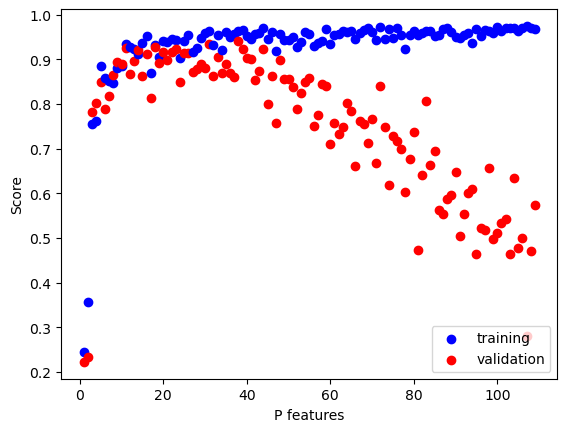

In [11]:
from sklearn.linear_model import Lasso

p_features = n_train + 10

for p in range(1, p_features):
    #generate data
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p, noise)
    #fit data to LASSO
    L = Lasso(alpha = 0.01)
    L.fit(X_train, y_train)  
    #score the model 
    score_train = L.score(X_train, y_train)
    score_val = L.score(X_val, y_val)
        
    if p == 1:
        plt.scatter(p, score_train, color = "blue", label = "training")
        plt.scatter(p, score_val, color = "red", label = "validation") 
    else:
        plt.scatter(p, score_train, color = "blue")
        plt.scatter(p, score_val, color = "red") 

labels = plt.gca().set(xlabel = "P features", ylabel = "Score")
legend = plt.legend(loc='lower right')

The LASSO algorithm performs much more poorly compared to linear regression, especially as you increase the value of the regularization strength (alpha). As we can expect, our model performs very well on the training data as the number of features used increases, but not on the validation data. The validation data experiences overfitting, just like our linear regression model, except the LASSO algorithm performs much worse on the validation data.  